In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Customer=pd.read_csv('Ecommerce Customers')
Customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
Customer.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
Customer.to_excel('Ecommerce Customers.xlsx',sheet_name='Sheet1')

C:\Users\CVU5R0CA3\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

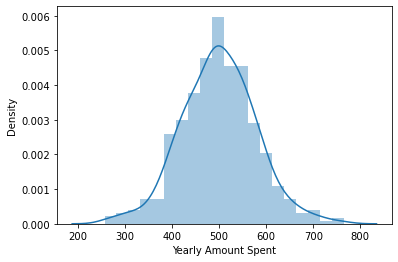

In [6]:
sns.distplot(Customer['Yearly Amount Spent'])

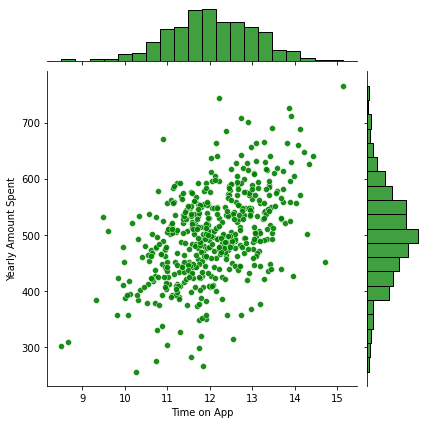

In [12]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=Customer,kind='scatter',color='green',alpha=0.9)

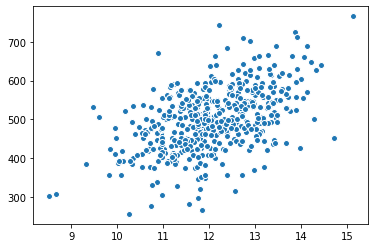

In [17]:
plt.scatter(Customer['Time on App'],Customer['Yearly Amount Spent'],cmap='plasma',edgecolors='white')

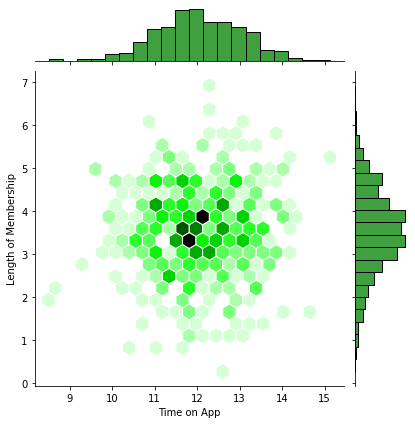

In [23]:
sns.jointplot(x='Time on App',y='Length of Membership',data=Customer,kind='hex',edgecolors='white',color='green', alpha=1)

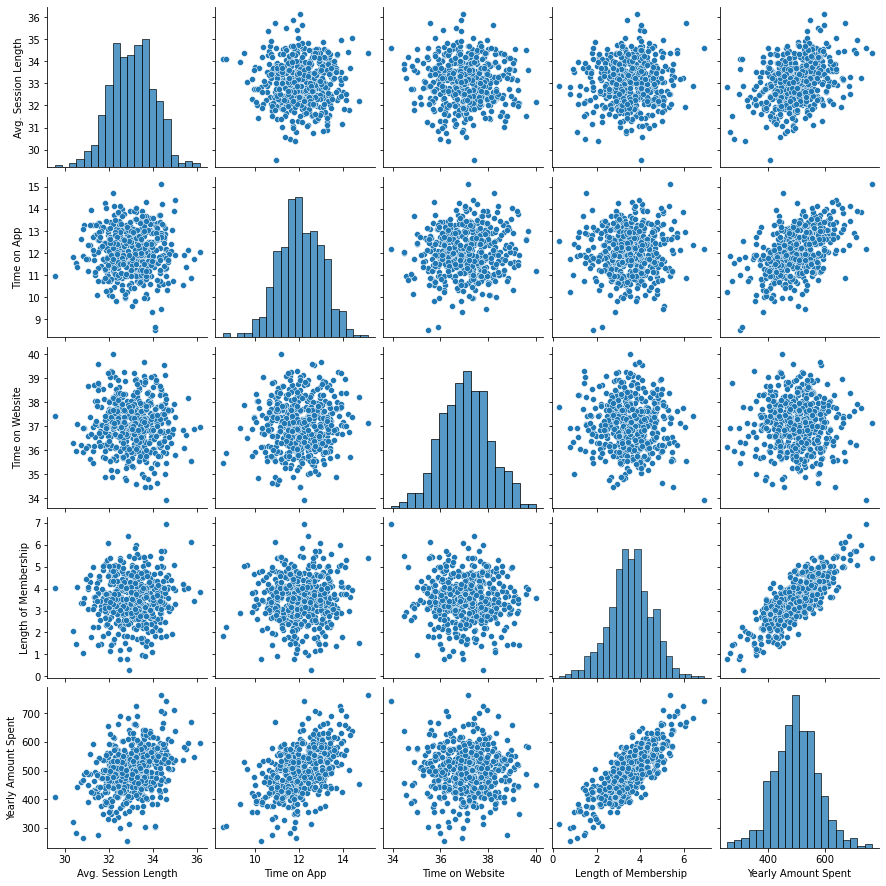

In [25]:
sns.pairplot(Customer,palette='bwr')

<AxesSubplot:>

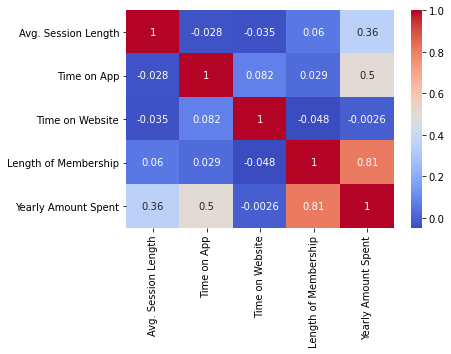

In [27]:
sns.heatmap(Customer.corr(),cmap='coolwarm',annot=True)

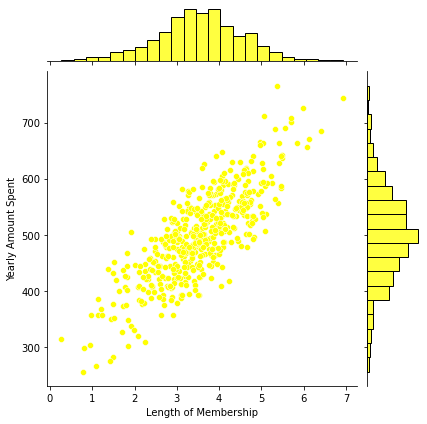

In [30]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=Customer,kind='scatter',color='yellow',alpha=1)

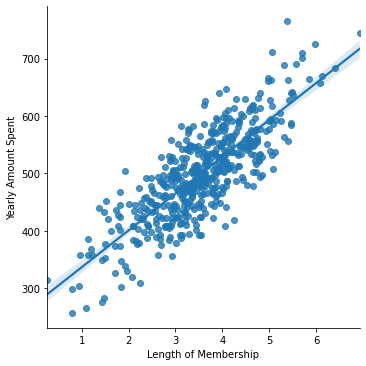

In [36]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=Customer)

In [38]:
X=Customer[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=Customer['Yearly Amount Spent']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [44]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
print(model.intercept_)
Coeff=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
Coeff

-1047.932782250239


,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Text(0, 0.5, 'Predictions')

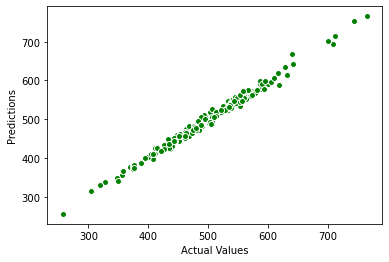

In [51]:
Prediction=model.predict(X_test)
plt.scatter(y_test,Prediction,edgecolors='white',color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

In [57]:
print('MAE:',metrics.mean_absolute_error(y_test,Prediction))
print('MSE:',metrics.mean_squared_error(y_test,Prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,Prediction)))

MAE: 7.228148653430832
MSE: 79.81305165097456
RMSE: 8.93381506697864


C:\Users\CVU5R0CA3\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Residuals of Yearly Amount Spent', ylabel='Density'>

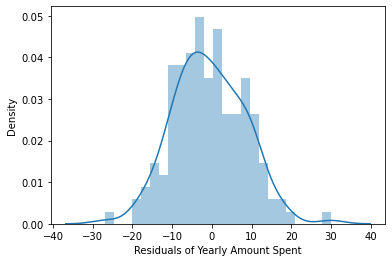

In [65]:
Residuals=y_test - Prediction
sns.distplot(Residuals,bins=25,axlabel='Residuals of Yearly Amount Spent')

In [70]:
metrics.explained_variance_score(y_test,Prediction)

0.9890771231889607